In [1]:
import numpy as np
import pandas as pd

**1. Data loading**

In [2]:
#dataset link : https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025?resource=download&select=ai_job_dataset.csv
df1 = pd.read_csv('/home/ikbr/Desktop/Shiva/salary-prediction-model/data/ai_job_dataset.csv')
df2 = pd.read_csv('/home/ikbr/Desktop/Shiva/salary-prediction-model/data/ai_job_dataset1.csv')

df = pd.concat([df1,df2])
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,salary_local
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,NaN
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,NaN
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,NaN
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,NaN
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  30000 non-null  object 
 1   job_title               30000 non-null  object 
 2   salary_usd              30000 non-null  int64  
 3   salary_currency         30000 non-null  object 
 4   experience_level        30000 non-null  object 
 5   employment_type         30000 non-null  object 
 6   company_location        30000 non-null  object 
 7   company_size            30000 non-null  object 
 8   employee_residence      30000 non-null  object 
 9   remote_ratio            30000 non-null  int64  
 10  required_skills         30000 non-null  object 
 11  education_required      30000 non-null  object 
 12  years_experience        30000 non-null  int64  
 13  industry                30000 non-null  object 
 14  posting_date            30000 non-null  obj

**2.Reamoving Duplicates and Null values in  Data**

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

job_id                        0
job_title                     0
salary_usd                    0
salary_currency               0
experience_level              0
employment_type               0
company_location              0
company_size                  0
employee_residence            0
remote_ratio                  0
required_skills               0
education_required            0
years_experience              0
industry                      0
posting_date                  0
application_deadline          0
job_description_length        0
benefits_score                0
company_name                  0
salary_local              15000
dtype: int64

In [6]:
data = df[['education_required','industry','job_title','experience_level','years_experience','company_location','salary_usd']]
data.head(10)

,education_required,industry,job_title,experience_level,years_experience,company_location,salary_usd
0,Bachelor,Automotive,AI Research Scientist,SE,9,China,90376
1,Master,Media,AI Software Engineer,EN,1,Canada,61895
2,Associate,Education,AI Specialist,MI,2,Switzerland,152626
3,PhD,Consulting,NLP Engineer,SE,7,India,80215
4,Master,Media,AI Consultant,EN,0,France,54624
5,Associate,Healthcare,AI Architect,SE,7,Germany,123574
6,Associate,Gaming,Principal Data Scientist,MI,3,United Kingdom,79670
7,Master,Healthcare,NLP Engineer,EN,0,France,70640
8,PhD,Government,Data Analyst,SE,7,Singapore,160710
9,Master,Government,AI Software Engineer,SE,5,Austria,102557


In [7]:
data = data.rename(columns={
    'education_required': 'education',
    'years_experience': 'years_of_experience',
})

In [8]:
data.head(10)

,education,industry,job_title,experience_level,years_of_experience,company_location,salary_usd
0,Bachelor,Automotive,AI Research Scientist,SE,9,China,90376
1,Master,Media,AI Software Engineer,EN,1,Canada,61895
2,Associate,Education,AI Specialist,MI,2,Switzerland,152626
3,PhD,Consulting,NLP Engineer,SE,7,India,80215
4,Master,Media,AI Consultant,EN,0,France,54624
5,Associate,Healthcare,AI Architect,SE,7,Germany,123574
6,Associate,Gaming,Principal Data Scientist,MI,3,United Kingdom,79670
7,Master,Healthcare,NLP Engineer,EN,0,France,70640
8,PhD,Government,Data Analyst,SE,7,Singapore,160710
9,Master,Government,AI Software Engineer,SE,5,Austria,102557


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   education            30000 non-null  object
 1   industry             30000 non-null  object
 2   job_title            30000 non-null  object
 3   experience_level     30000 non-null  object
 4   years_of_experience  30000 non-null  int64 
 5   company_location     30000 non-null  object
 6   salary_usd           30000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.8+ MB


**Let's see more about dataset and it's column's so we can create good forntend**


In [10]:
for x in data.columns:
    print(data[x].unique(),'\n')

['Bachelor' 'Master' 'Associate' 'PhD'] 

['Automotive' 'Media' 'Education' 'Consulting' 'Healthcare' 'Gaming'
 'Government' 'Telecommunications' 'Manufacturing' 'Energy' 'Technology'
 'Real Estate' 'Finance' 'Transportation' 'Retail'] 

['AI Research Scientist' 'AI Software Engineer' 'AI Specialist'
 'NLP Engineer' 'AI Consultant' 'AI Architect' 'Principal Data Scientist'
 'Data Analyst' 'Autonomous Systems Engineer' 'AI Product Manager'
 'Machine Learning Engineer' 'Data Engineer' 'Research Scientist'
 'ML Ops Engineer' 'Robotics Engineer' 'Head of AI'
 'Deep Learning Engineer' 'Data Scientist' 'Machine Learning Researcher'
 'Computer Vision Engineer'] 

['SE' 'EN' 'MI' 'EX'] 

[ 9  1  2  7  0  3  5  8 15  6  4 16 10 18 12 19 17 13 11 14] 

['China' 'Canada' 'Switzerland' 'India' 'France' 'Germany'
 'United Kingdom' 'Singapore' 'Austria' 'Sweden' 'South Korea' 'Norway'
 'Netherlands' 'United States' 'Israel' 'Australia' 'Ireland' 'Denmark'
 'Finland' 'Japan'] 

[ 90376  61895 152626 

- *in above we can understand every thing except experince level let's see what are those.*
    - *SE : Senior*
    - *EN : Entry level*
    - *MI : Mid level*
    - *EX : Executive*

In [11]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['education','industry','job_title','experience_level','years_of_experience','company_location']

label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [12]:
data.head(10)

,education,industry,job_title,experience_level,years_of_experience,company_location,salary_usd
0,1,0,3,3,9,3,90376
1,2,9,4,0,1,2,61895
2,0,2,5,2,2,17,152626
3,3,1,16,3,7,8,80215
4,2,9,1,0,0,6,54624
5,0,7,0,3,7,7,123574
6,0,5,17,2,3,18,79670
7,2,7,16,0,0,6,70640
8,3,6,8,3,7,14,160710
9,2,6,4,3,5,1,102557


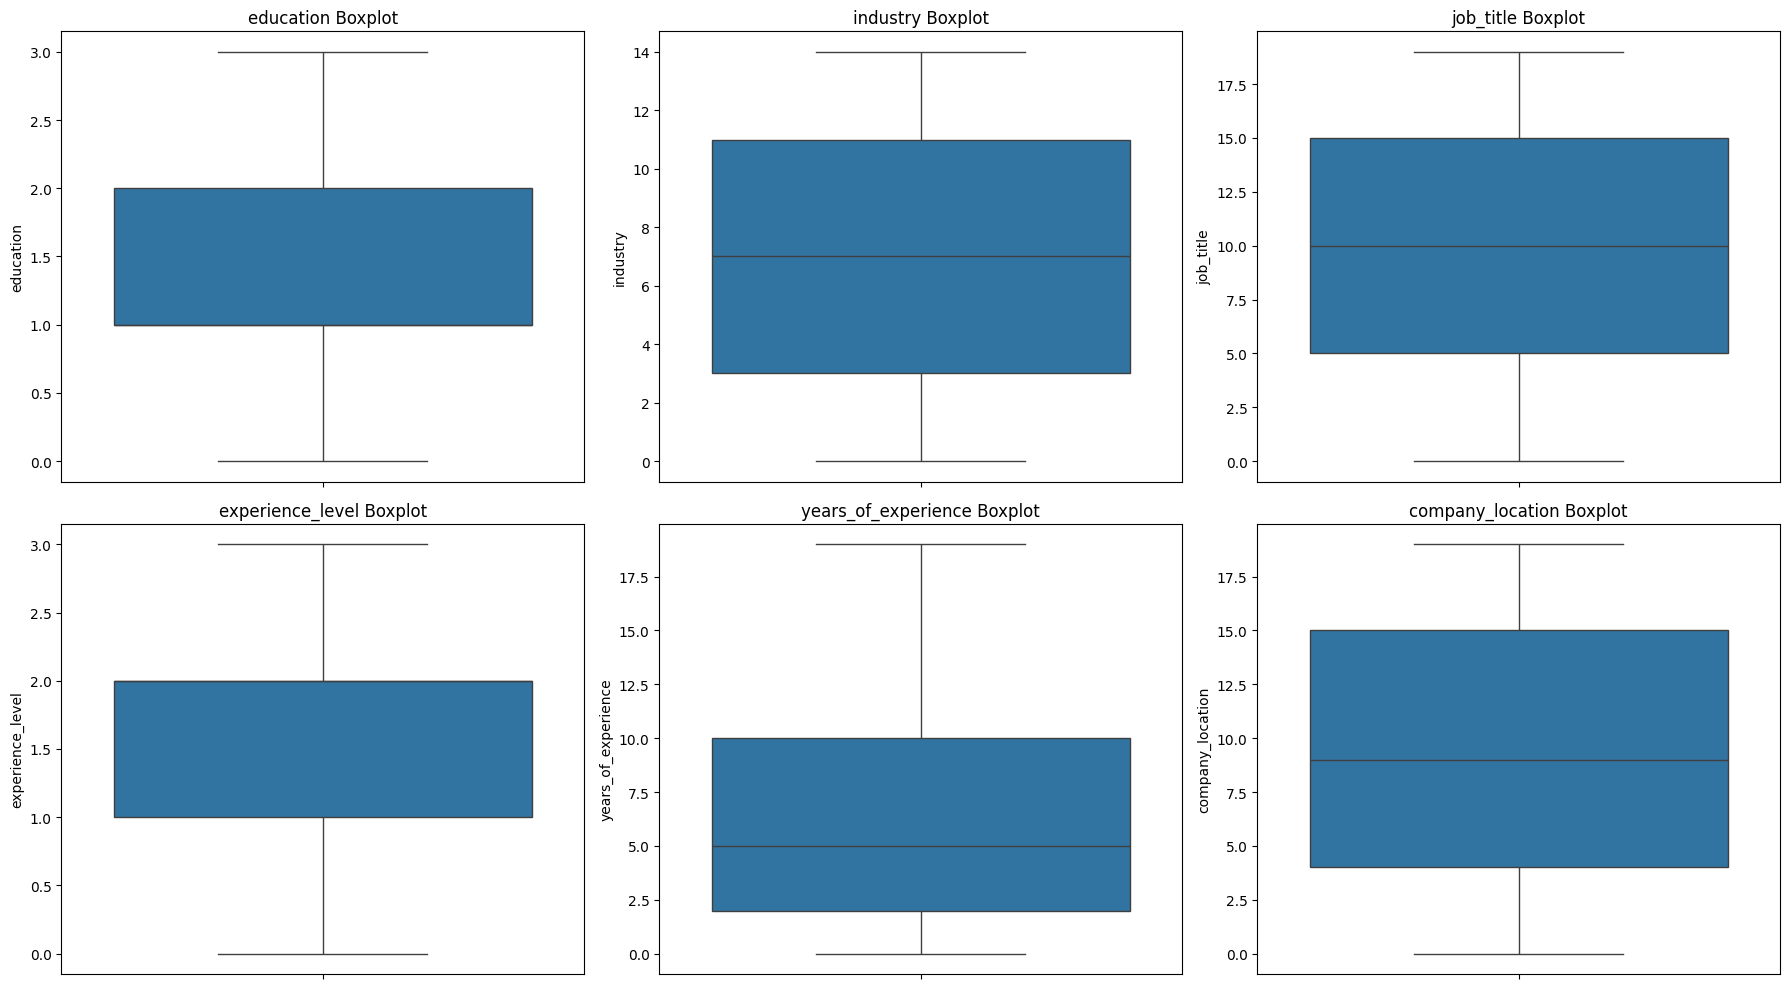

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for ax, col in zip(axes, categorical_columns):
    sns.boxplot(y=data[col], ax=ax)
    ax.set_title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

In [14]:
x = data[['education','industry','job_title','experience_level','years_of_experience','company_location']]
y = data['salary_usd']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42,)

In [16]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10]
# }
# grid = GridSearchCV(RandomForestRegressor(random_state=42),
#                     param_grid, cv=3, n_jobs=-1) #, verbose=2
# grid.fit(x_train, y_train)
# print(grid.best_params_)


In [17]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_split=10,
    random_state=42
)
model.fit(x_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<Axes: >

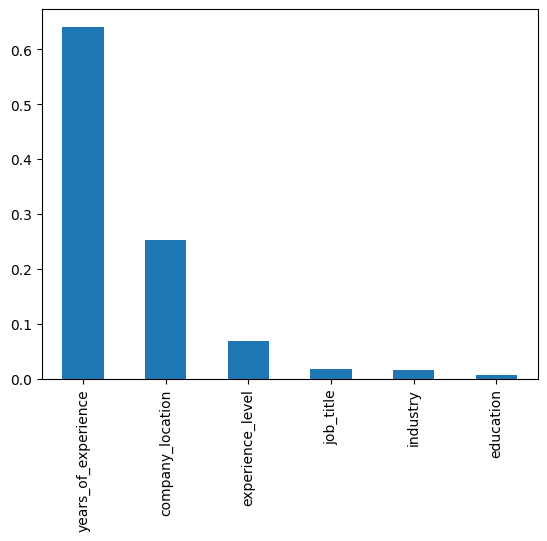

In [18]:
feat_importance = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importance.sort_values(ascending=False).plot(kind='bar')

In [19]:
y_pred = model.predict(x_test)
y_pred

array([ 72854.79005456, 105510.01052279, 206947.55745063, ...,
        37008.54046394, 120474.82540227, 259356.01739857])

In [20]:
from sklearn.metrics import *
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(r2,'\n',mse,'\n',rmse,'\n',mae)

0.8053954209580212 
 769084018.7088473 
 27732.364102413758 
 20229.929974946903


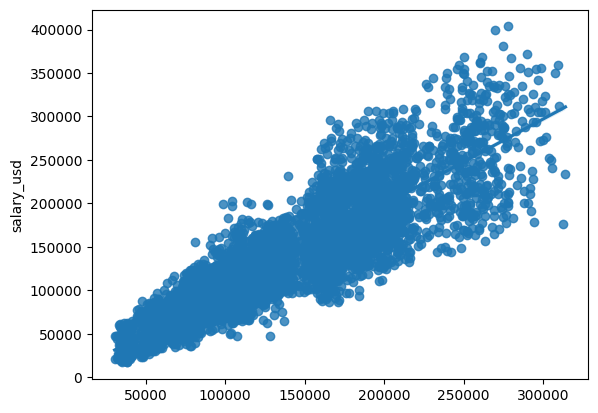

In [21]:
sns.regplot(x=y_pred,y=y_test)
plt.show()

In [22]:
input_values = pd.DataFrame([[1,0,3,3,4,6]])
pred = model.predict(input_values)
print('your salary :', pred)

your salary : [106661.39914593]


/home/ikbr/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [23]:
education = str(input('Enter your Education'))
industry = str(input('Enter your required job Industry'))
job_title = str(input('Enter your Job Title'))
experience_level = str(input('enter the experience level in job'))
years_of_experience = int(input('enter years of experience in your job'))
company_location = str(input('Enter your compyany location'))

input_df = pd.DataFrame([[education, industry, job_title, experience_level, years_of_experience, company_location]],
                        columns=['education', 'industry', 'job_title', 'experience_level', 'years_of_experience', 'company_location'])
print(input_df)
for column in ['education', 'industry', 'job_title', 'experience_level', 'company_location']:
    if column in label_encoders:
        try:
            input_df[column] = label_encoders[column].transform(input_df[column])
        except ValueError:
            print(f"warning: '{input_df[column][0]}' not seen during training for '{column}'. Assigning as -1.")
            input_df[column] = -1
print(input_df)
prediction = model.predict(input_df)
print("Predicted salary:", prediction[0])

  education    industry     job_title experience_level  years_of_experience  \
0  Bachelor  Government  AI Architect               SE                    7   

  company_location  
0            India  
   education  industry  job_title  experience_level  years_of_experience  \
0          1         6          0                 3                    7   

   company_location  
0                 8  
Predicted salary: 58902.187938402094


In [24]:
import pickle
with open('/home/ikbr/Desktop/Shiva/salary-prediction-model/model/model.pkl','wb') as file:
    pickle.dump(model,file)